# 2 - CALIDAD DE DATOS

## IMPORTACIÓN DE PAQUETES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## CARGAR LOS DATOS

In [3]:
df = pd.read_csv('../../02_Datos/03_Trabajo/trabajo.csv', index_col=0)

## CORREGIR EL NOMBRE DE LAS VARIABLES

El nombre de las variables ha sido modificado manualmente en el notebook de Set up. 

## VISIÓN GENERAL

In [4]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
5,A,A,P,P,P,A,NB


## TIPOS DE DATOS

In [5]:
df.dtypes

industrial_risk          object
management_risk          object
financial_flexibility    object
credibility              object
competitiveness          object
operating_risk           object
target                   object
dtype: object

## BALANCEO DE LA TARGET

In [6]:
df.target.value_counts(normalize=True)

NB    0.547872
B     0.452128
Name: target, dtype: float64

The data is balanced

## VALORES ÚNICOS

In [7]:
df.nunique()

industrial_risk          3
management_risk          3
financial_flexibility    3
credibility              3
competitiveness          3
operating_risk           3
target                   2
dtype: int64

There aren't unique values

## VALORES DUPLICADOS

In [8]:
df.duplicated().sum()

97

The data has duplicate value. We remove the duplicates:

In [9]:
df = df.drop_duplicates()
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
5,A,A,P,P,P,A,NB
...,...,...,...,...,...,...,...
178,A,P,N,A,N,N,B
179,N,N,N,P,N,P,B
182,N,N,N,P,N,N,B
215,N,A,P,A,N,P,B


We check the data balance again:

In [10]:
df.target.value_counts(normalize= True)

NB    0.725275
B     0.274725
Name: target, dtype: float64

## VALORES NULOS

In [11]:
df.isna().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
target                   0
dtype: int64

The dataset does not have null values.

## GESTIÓN DE CATEGÓRICAS

Estadísticos y gráficos de las variables.

In [12]:
def estadisticos_cont(df_cat):
    #Calculamos describe
    estadisticos = df_cat.describe().T
    return(estadisticos)

estadisticos_cont(df)

,count,unique,top,freq
industrial_risk,91,3,P,31
management_risk,91,3,N,37
financial_flexibility,91,3,A,32
credibility,91,3,A,36
competitiveness,91,3,P,43
operating_risk,91,3,N,39
target,91,2,NB,66


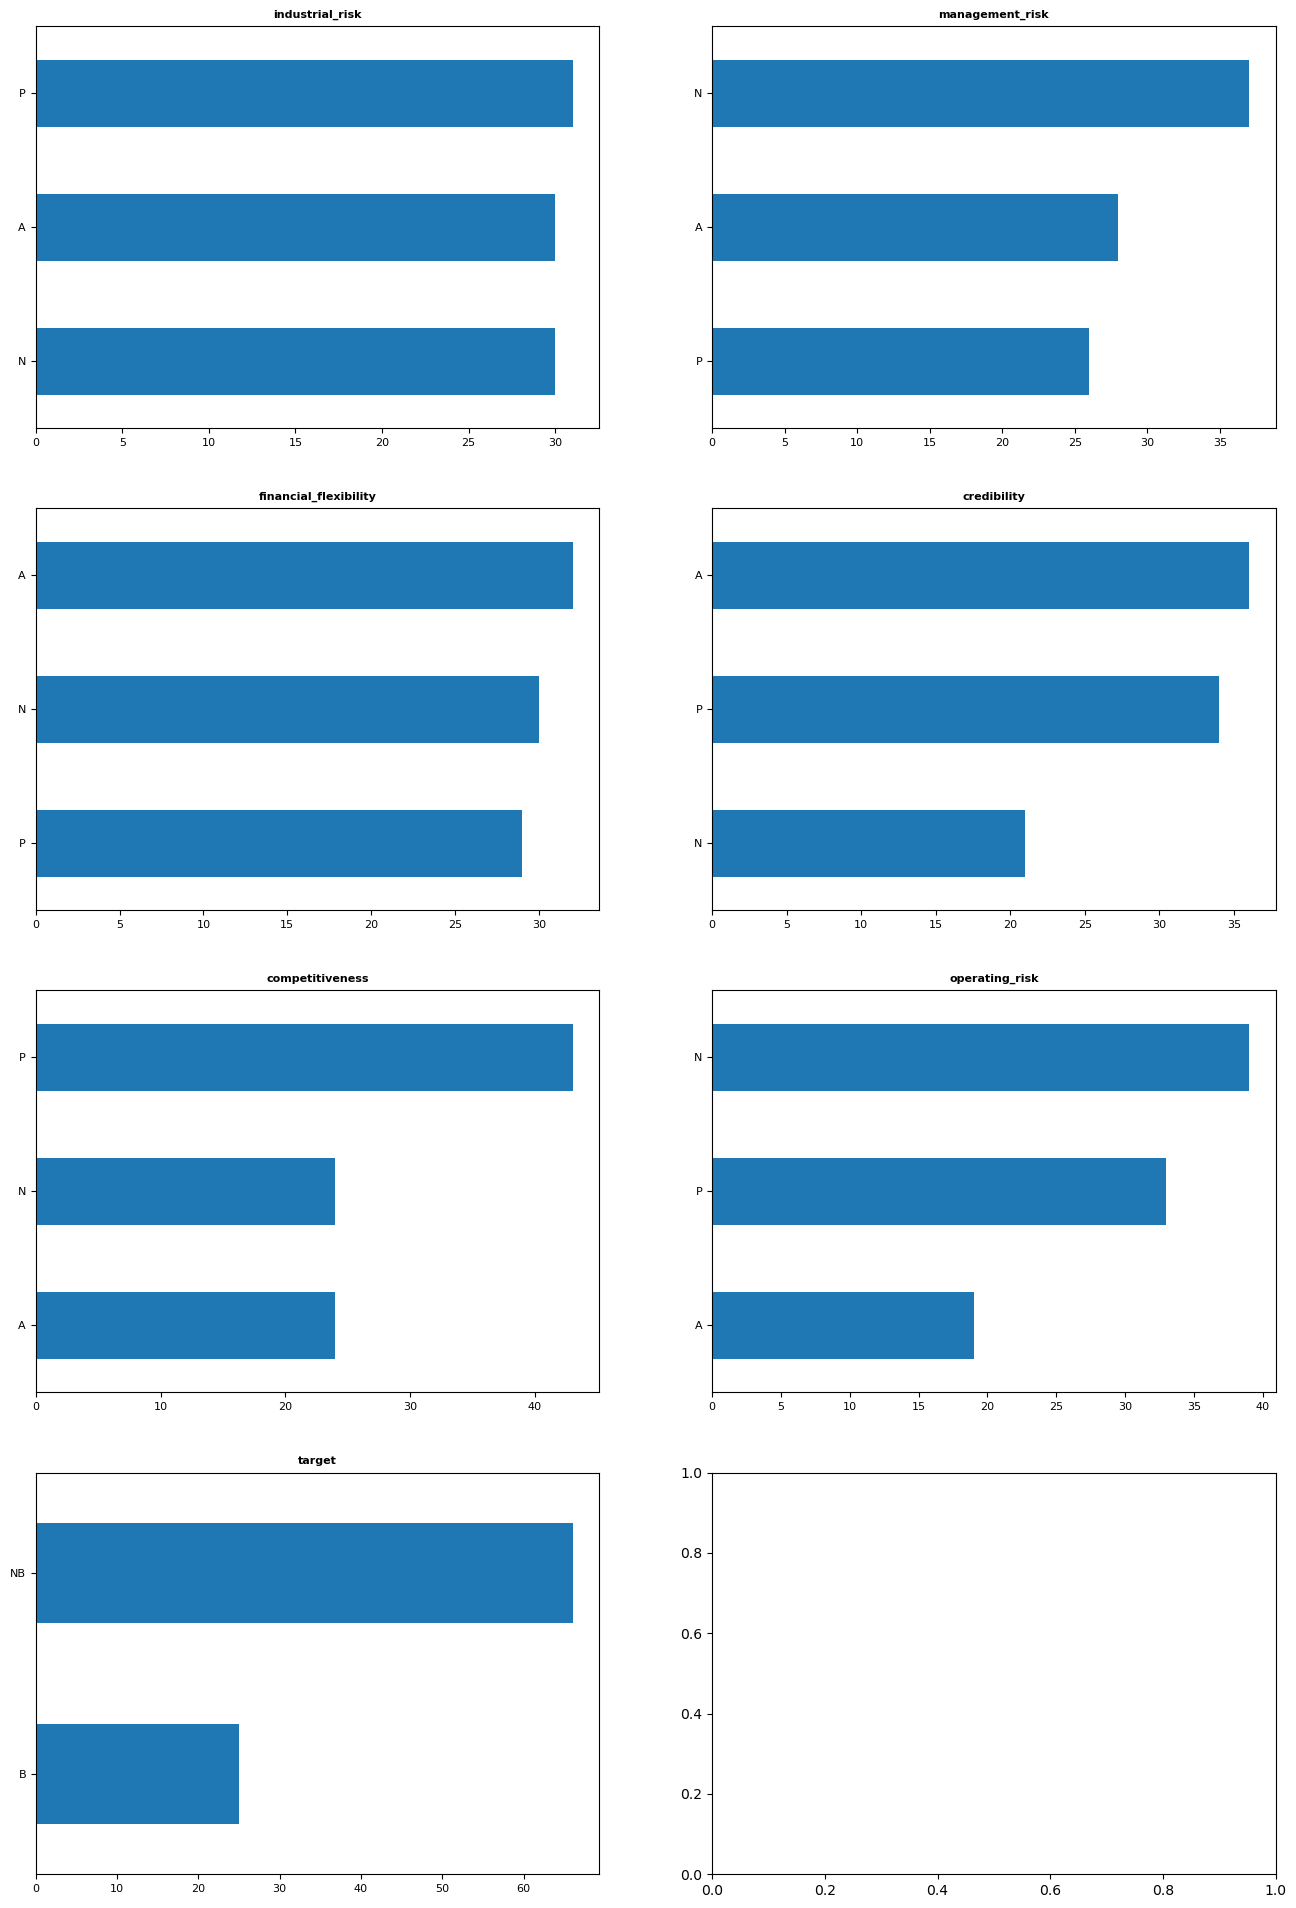

In [13]:
def graficos_eda_categoricos(df_cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(df_cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(df_cat):
        df_cat[variable].value_counts(ascending = True).plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 8, fontweight = "bold")
        ax[cada].tick_params(labelsize = 8)
                
graficos_eda_categoricos(df)

### GESTIÓN DE ATÍPICOS

No se detecta ninguna categórica con poco frecuencia (salvo la target).

## GUARDAR DATASET TRAS CALIDAD DE DATOS

In [14]:
df.to_csv('../../02_Datos/03_Trabajo/tablon_analitico.csv')

## **CONCLUSIÓN:**

- Hemos reducido el dataset quitando registros duplicados.
- No se detectan valores atípicos en las variables categóricas.